# K-Means

Unsupervised learning: pick k points in euclidean space, and then assign each point in the grid to a cluster.

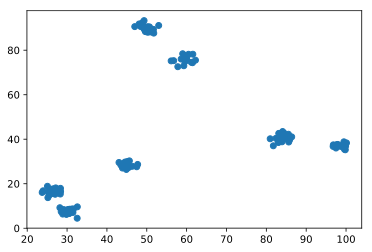

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

# For comparison, later.
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

clusters = 7
sigma = 2

all_points = []

for i in range(clusters):
    count = 20
    centre = np.random.random((2,)) * 100
    points = np.random.multivariate_normal(centre, [[sigma, 0], [0, sigma]], (count,))
    all_points.extend(points)

all_points = np.array(all_points)
plt.scatter(all_points[:,0], all_points[:,1])

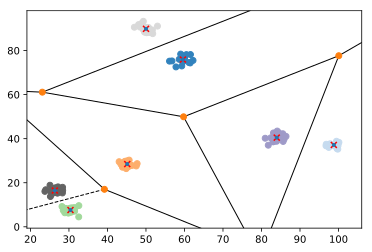

In [2]:
def k_means(points, clusters):
    max_point = np.max(points)
    centres = np.random.random((clusters, 2)) * max_point
    
    for _ in range(300):
        cluster = {i: [] for i in range(clusters)}
        assignments = []

        for i in range(len(points)):
            distances = np.linalg.norm(points[i] - centres, axis=1)
            choice = np.argmin(distances)
            
            cluster[choice].append(points[i])
            assignments.append(choice)
        
        for c in range(clusters):
            if len(cluster[c]) == 0:
                centres[c] = np.random.random(2) * max_point
            else:
                centres[c] = sum(cluster[c]) / len(cluster[c])
        
    return np.array(centres), assignments

centres, assignments = k_means(all_points, clusters)

vor = Voronoi(centres)
voronoi_plot_2d(vor)
plt.scatter(all_points[:,0], all_points[:,1], c=assignments, cmap='tab20c')
plt.scatter(centres[:, 0], centres[:, 1], marker='x', c='r')
plt.show()

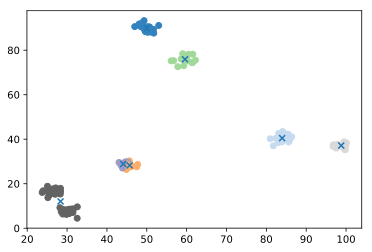

In [3]:
# Compare to sklearn k-means
clusterer = KMeans(clusters, init='random', algorithm='full')
clusterer.fit(all_points)

plt.scatter(all_points[:,0], all_points[:,1], c=clusterer.labels_, cmap='tab20c')
plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1], marker='x')
plt.show()